## 指定のディレクトリからデータを読みだして学習に掛ける

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

In [2]:
with open("./t_fal_audio_data/np_data.dat", mode="rb") as f:
    data=np.fromfile(f,dtype=float)

### データは1配列で返されるので書き込み時の状態に変換する

In [3]:
size=2**12 #サンプリングのデータサイズを入力
n=int(len(data)/(size+1))

data=data.reshape((n, size+1))

print(type(data))
print(len(data))
print(len(data[0]))
print(data[0])

<class 'numpy.ndarray'>
40
4097
[0.214      0.11075341 0.15259981 ... 0.02155629 0.05022515 0.15259981]


In [4]:
temp_data=np.array([])
sound_data=np.array([])
for i in range(len(data)):
    temp_data=np.append(temp_data, data[i][0].real)
    sound_data=np.append(sound_data, data[i][1:])

sound_data=sound_data.reshape((n,size))

"""
temp_data:測定温度の配列(float)
sound_data:音声スペクトルデータの2次元配列([[complex]...[]])
"""

    
print(len(sound_data[0]))
print(temp_data)
print(type(temp_data[0]))

4096
[0.214 0.24  0.265 0.345 0.308 0.346 0.33  0.34  0.42  0.38  0.431 0.423
 0.482 0.479 0.501 0.503 0.513 0.579 0.55  0.567 0.592 0.689 0.636 0.661
 0.671 0.69  0.718 0.759 0.75  0.775 0.856 0.795 0.831 0.833 0.861 0.91
 0.886 0.92  0.942 0.94 ]
<class 'numpy.float64'>


<font size=5 color="red">予測データの用意</font>

In [5]:
with open("./t_fal_audio_data/np_prediction_data.dat", mode="rb") as f:
    prediction_data=np.fromfile(f,dtype=float)

prediction_data=prediction_data.reshape((10,4097))

prediciton_temp_data=np.array([])
prediciton_sound_data=np.array([])
for i in range(len(prediction_data)):
    prediciton_temp_data=np.append(prediciton_temp_data, prediction_data[i][0])
    prediciton_sound_data=np.append(prediciton_sound_data, prediction_data[i][1:])
    
prediciton_sound_data=prediciton_sound_data.reshape((10,4096))

print(prediciton_temp_data)
print(prediciton_sound_data)

[33.  42.2 49.8 60.5 67.  70.5 75.9 82.1 85.8 91.7]
[[0.07170207 0.08974837 0.0852675  ... 0.07528725 0.0852675  0.08974837]
 [0.081953   0.09420389 0.10618163 ... 0.0246869  0.10618163 0.09420389]
 [0.17753448 0.0796667  0.05342869 ... 0.11737094 0.05342869 0.0796667 ]
 ...
 [0.01008851 0.07105503 0.08758143 ... 0.03424141 0.08758143 0.07105503]
 [0.11010878 0.07297494 0.02128973 ... 0.03864819 0.02128973 0.07297494]
 [0.03787634 0.02785253 0.10334471 ... 0.37592443 0.10334471 0.02785253]]


# TFのkerasで学習装置を実装してみる

In [88]:
model=keras.Sequential([
    keras.layers.Dense(4096, activation=tf.nn.relu, input_dim=4096),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

In [89]:
#optimizer = tf.train.RMSPropOptimizer(0.5)
optimizer = tf.train.AdamOptimizer()

def abs_percent(y_ture, y_pred):
    return 1-abs((y_pred-y_ture)/y_ture)
 
model.compile(loss='mse',
            optimizer=optimizer,
            metrics=[abs_percent])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dense_51 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_53 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 11        
Total params: 18,945,941
Trainable params: 18,945,941
Non-trainable params: 0
________________________________________________________________

Epoch 1/20
40/40 [==============================] - 2s 38ms/step - loss: 0.6338 - abs_percent: -0.1410
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 1.4226 - abs_percent: -0.8244
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1132 - abs_percent: 0.5377
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1651 - abs_percent: 0.4032
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0869 - abs_percent: 0.6396
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0874 - abs_percent: 0.6210
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0545 - abs_percent: 0.6858
Epoch 8/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0902 - abs_percent: 0.5737
Epoch 9/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0563 - abs_percent: 0.7082
Epoch 10/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0782 - abs_pe

KeyError: 'val_loss'

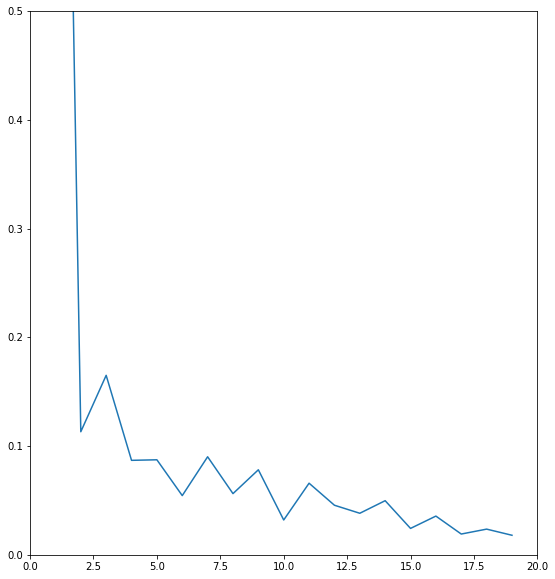

In [90]:
epochs=20

fit=model.fit(sound_data, temp_data, epochs=epochs, callbacks=None, validation_split=0)


plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.xlim(0,epochs)
plt.ylim(0, 0.5)
plt.plot(fit.history['loss'], label="loss of training")
plt.plot(fit.history['val_loss'], label="loss of validation")
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.xlim(0,epochs)
plt.ylim(0, 1)
plt.plot(fit.history['abs_percent'], label="acc of training")
plt.plot(fit.history['val_abs_percent'], label="acc of validation")
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

plt.show()

In [91]:
test_loss, test_acc = model.evaluate(sound_data, temp_data)

print("Test_loss:", test_loss)
print("Test_accuracy:", test_acc)

40/40 [==============================] - 0s 6ms/step
Test_loss: 0.01245165392756462
Test_accuracy: 0.8568404674530029


In [92]:
test_loss, test_acc = model.evaluate(prediciton_sound_data, prediciton_temp_data)

print("Test_loss:", test_loss)
print("Test_accuracy:", test_acc)

10/10 [==============================] - 0s 2ms/step
Test_loss: 4593.4169921875
Test_accuracy: 0.009174984879791737


## モデルで予想をしてみる

In [97]:
pre_temp=model.predict(sound_data)

print(type(pre_temp))

error=np.array([])
error_abs=np.array([])
for i in range(len(temp_data)):
    error=np.append(error, (pre_temp[i]-temp_data[i])/temp_data[i]*100)
    error_abs=np.append(error_abs, abs((pre_temp[i]-temp_data[i])/temp_data[i]*100))

np.set_printoptions(precision=2, suppress=True)
print(error)
print(error_abs)
print("error average is {:.2g} %".format(np.mean(error)))
print("error absolute average is {:.2g} %".format(np.mean(error_abs)))

<class 'numpy.ndarray'>
[ 32.58  17.47  -6.7   -2.93  15.28  17.28  17.62  13.35 -10.88  33.
  20.21  25.48  -2.19  14.4    0.23   5.12 -14.08 -13.71 -23.49 -26.66
  -1.58 -10.88   0.57 -16.58  -6.72   3.97  -8.63  -8.13 -22.05 -15.21
  -6.93   5.77   7.15  -7.04   9.44  20.33  33.98 -20.42 -21.68 -32.91]
[32.58 17.47  6.7   2.93 15.28 17.28 17.62 13.35 10.88 33.   20.21 25.48
  2.19 14.4   0.23  5.12 14.08 13.71 23.49 26.66  1.58 10.88  0.57 16.58
  6.72  3.97  8.63  8.13 22.05 15.21  6.93  5.77  7.15  7.04  9.44 20.33
 33.98 20.42 21.68 32.91]
error average is 0.35 %
error absolute mean is 14 %


In [96]:
pre_test_temp=model.predict(prediciton_sound_data)*100

test_error=np.array([])
test_error_abs=np.array([])
for i in range(len(prediciton_temp_data)):
    test_error=np.append(test_error, (pre_test_temp[i]-prediciton_temp_data[i])/prediciton_temp_data[i]*100)
    test_error_abs=np.append(test_error_abs, abs((pre_test_temp[i]-prediciton_temp_data[i])/prediciton_temp_data[i]*100))
    
print(test_error)
print("test error average is {:.2g} %".format(np.mean(test_error)))
print("absolute test error average is {:.2g} %".format(np.mean(test_error_abs)))

print(pre_test_temp)
print(prediciton_temp_data)

[  1.72  23.87  13.2  -11.61 -16.11 -31.24 -35.43  10.62 -19.05 -18.47]
test error average is -8.3 %
absolute test error average is 18 %
[[33.57]
 [52.27]
 [56.38]
 [53.48]
 [56.21]
 [48.47]
 [49.01]
 [90.82]
 [69.46]
 [74.76]]
[33.  42.2 49.8 60.5 67.  70.5 75.9 82.1 85.8 91.7]
